In [57]:
import pandas as pd
import numpy as np

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [59]:
df = pd.read_csv('laptops.csv')

In [60]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Preparing the dataset

In [61]:
df.shape

(2160, 12)

In [62]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [63]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

Next, use only the following columns:

-   `'ram'`,
-   `'storage'`,
-   `'screen'`,
-   `'final_price'`

In [64]:
df = df[['ram', 'storage', 'screen', 'final_price']]

In [65]:
df.screen.value_counts()

screen
15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.50      19
13.40      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
12.00       4
18.00       3
14.50       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: count, dtype: int64

## EDA
Load the data.
Look at the median_house_value variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

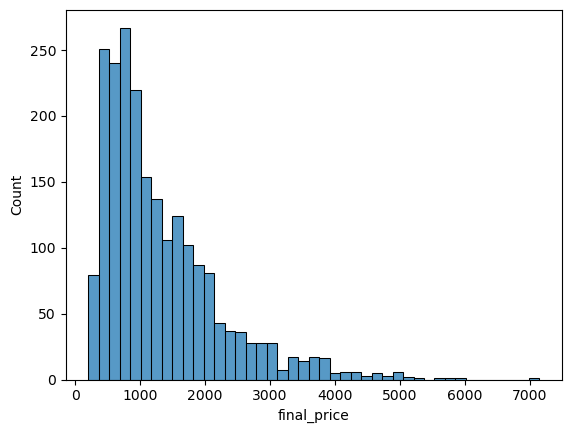

In [66]:
sns.histplot(df.final_price)

`final_price` column does have a long tail.

### [Question 1](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md#question-1)

There's one column with missing values. What is it?

-   `'ram'`
-   `'storage'`
-   `'screen'`
-   `'final_price'`

In [67]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Thus `screen` is the column with 4 missing values.

### [Question 2](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md#question-2)

What's the median (50% percentile) for variable `'ram'`?

-   8
-   16
-   24
-   32

In [68]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


From the results of `df.describe()`, we can see that the 50% percentile for variable `'ram'` is 16.

Another way to see the median of a column is `median()`

In [69]:
df.ram.median()

16.0

## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [70]:
n = len(df)
n

2160

In [71]:
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

In [72]:
print(n_train, n_val, n_test)

1296 432 432


In [73]:
idx = np.arange(n)

In [74]:
np.random.seed(42)
np.random.shuffle(idx)

In [75]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [76]:
print(len(df_train), n_train)
print(len(df_val), n_val)
print(len(df_test), n_test)

1296 1296
432 432
432 432


In [77]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,ram,storage,screen,final_price
0,32,1000,15.6,4805.65
1,16,512,13.0,2189.00
2,16,512,15.6,1349.00
3,16,512,15.0,2175.83
4,16,1000,15.6,1248.59
...,...,...,...,...
427,8,512,15.0,1838.29
428,8,256,15.6,531.80
429,8,256,13.3,765.33
430,8,512,14.0,803.61


### [Question 3](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md#question-3)

-   We need to deal with missing values for the column from Q1.
-   We have two options: fill it with 0 or with the mean of this variable.
-   Try both options. For each, train a linear regression model without regularization using the code from the lessons.
-   For computing the mean, use the training only!
-   Use the validation dataset to evaluate the models and compare the RMSE of each option.
-   Round the RMSE scores to 2 decimal digits using `round(score, 2)`
-   Which option gives better RMSE?

#### Fill missing values with 0

In [78]:
def prepare_X_y(df, y_column_list, fill_value):
    df = df.copy()
    y = df[y_column_list] if isinstance(y_column_list, list) else df[[y_column_list]]
    y = y.values
    
    X = df.drop(y_column_list, axis=1)
    X = X.fillna(fill_value, inplace=False)
    X = X.values
    return X, y

In [79]:
def train_linear_regression_without_regularization(X, y):
    intercepted_X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = intercepted_X.T.dot(intercepted_X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(intercepted_X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [80]:
def rmse(y, y_pred):
    err = y - y_pred
    serr = err ** 2
    mse = serr.mean()
    return np.sqrt(mse)

In [81]:
X_train, y_train = prepare_X_y(df_train, ['final_price'], 0)
X_val, y_val = prepare_X_y(df_val, ['final_price'], 0)

In [82]:
w0, w = train_linear_regression_without_regularization(X_train, y_train)


In [83]:
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

602.3920520606714

In [84]:
y_val_pred = w0 + X_val.dot(w)
rmse_val_0 = rmse(y_val, y_val_pred)
rmse_val_0

597.3635593619622

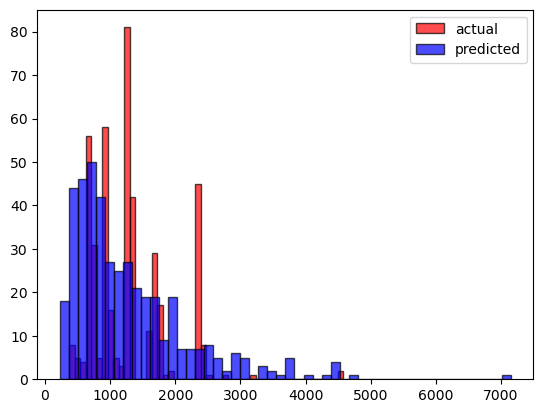

In [85]:
plt.hist(y_val_pred, bins=50, alpha=0.7, label="actual", color='red', edgecolor="black")
plt.hist(y_val, bins=50, alpha=0.7, label="predicted", color='blue', edgecolor="black")
plt.legend()
plt.show()

#### Fill missing values with mean

In [86]:
means = df_train.drop('final_price', axis=1).mean()
means

ram         15.666667
storage    599.101852
screen      15.163534
dtype: float64

In [87]:
X_train, y_train = prepare_X_y(df_train, ['final_price'], means)
X_val, y_val = prepare_X_y(df_val, ['final_price'], means)

In [88]:
w0, w = train_linear_regression_without_regularization(X_train, y_train)

In [89]:
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

602.1844959403247

In [90]:
y_val_pred = w0 + X_val.dot(w)
rmse_val_mean = rmse(y_val, y_val_pred)
rmse_val_mean

600.2650313748433

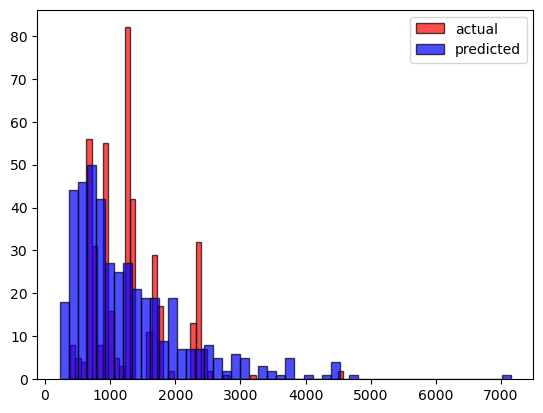

In [91]:
plt.hist(y_val_pred, bins=50, alpha=0.7, label="actual", color='red', edgecolor="black")
plt.hist(y_val, bins=50, alpha=0.7, label="predicted", color='blue', edgecolor="black")
plt.legend()
plt.show()

#### Fill missing values with nearest

In [92]:

def prepare_X_y_nearest(df, y_column_list):
    df = df.copy()
    y = df[y_column_list] if isinstance(y_column_list, list) else df[[y_column_list]]
    y = y.values
    
    X = df.drop(y_column_list, axis=1)
    X = X.interpolate(method='nearest')
    X = X.values
    return X, y

In [93]:
X_train, y_train = prepare_X_y_nearest(df_train, ['final_price'])
X_val, y_val = prepare_X_y_nearest(df_val, ['final_price'])

In [94]:
w0, w = train_linear_regression_without_regularization(X_train, y_train)

In [95]:
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

602.1228002904469

In [96]:
y_val_pred = w0 + X_val.dot(w)
rmse_val_nearest = rmse(y_val, y_val_pred)
rmse_val_nearest

600.508642226338

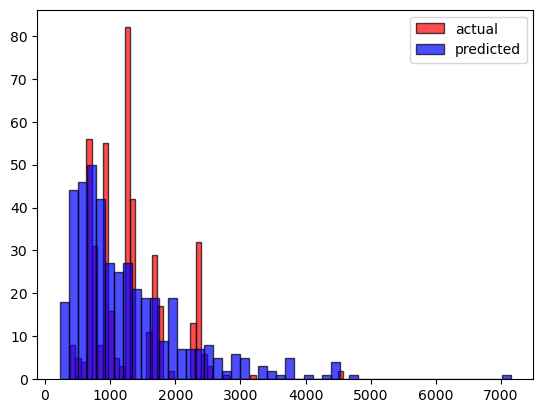

In [97]:
plt.hist(y_val_pred, bins=50, alpha=0.7, label="actual", color='red', edgecolor="black")
plt.hist(y_val, bins=50, alpha=0.7, label="predicted", color='blue', edgecolor="black")
plt.legend()
plt.show()

In [98]:
print(f"When fill missing values with 0, the rmse value: {round(rmse_val_0, 2)}")
print(f"When fill missing values with mean, the rmse value: {round(rmse_val_mean, 2)}")
print(f"When fill missing values with nearest, the rmse value: {round(rmse_val_nearest, 2)}")

When fill missing values with 0, the rmse value: 597.36
When fill missing values with mean, the rmse value: 600.27
When fill missing values with nearest, the rmse value: 600.51


### [Question 4](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md#question-4)

-   Now let's train a regularized linear regression.
-   For this question, fill the NAs with 0.
-   Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
-   Use RMSE to evaluate the model on the validation dataset.
-   Round the RMSE scores to 2 decimal digits.
-   Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

-   0
-   0.01
-   1
-   10
-   100

In [99]:
def train_linear_regression_with_regularization(X, y, r):
    intercepted_X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = intercepted_X.T.dot(intercepted_X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(intercepted_X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [100]:
X_train, y_train = prepare_X_y(df_train, ['final_price'], 0)
X_val, y_val = prepare_X_y(df_val, ['final_price'], 0)

In [101]:
rmse_vals = []
rmse_trains = []
r_list = [0, 0.001, 0.01, 0.1, 1, 5, 10, 100]

for r in r_list:
    w0, w = train_linear_regression_with_regularization(X_train, y_train, r)

    y_train_pred = w0 + X_train.dot(w)
    rmse_train = round(rmse(y_train, y_train_pred), 3)
    
    y_val_pred = w0 + X_val.dot(w)
    rmse_val = round(rmse(y_val, y_val_pred), 3)
    
    rmse_vals.append(rmse_val)
    rmse_trains.append(rmse_train)

In [102]:
rmse_data = {'r': r_list, 'rmse_train': rmse_trains, 'rmse_val': rmse_vals}
rmse_df = pd.DataFrame(rmse_data)
print(rmse_df)

         r  rmse_train  rmse_val
0    0.000     602.392   597.364
1    0.001     602.392   597.363
2    0.010     602.392   597.362
3    0.100     602.392   597.345
4    1.000     602.415   597.212
5    5.000     602.709   597.011
6   10.000     603.126   597.059
7  100.000     604.988   597.903


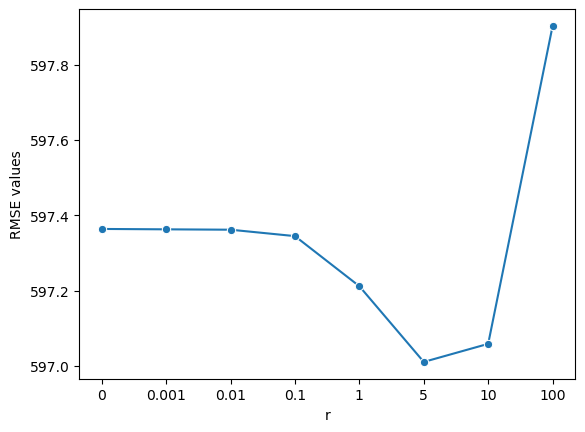

In [103]:
sns.lineplot(x=[str(r) for r in r_list], y=rmse_vals, marker='o', linestyle='-')
plt.ylabel('RMSE values')
plt.xlabel('r')
plt.show()

### [Question 5](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md#question-5)

-   We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
-   Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
-   For each seed, do the train/validation/test split with 60%/20%/20% distribution.
-   Fill the missing values with 0 and train a model without regularization.
-   For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
-   What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
-   Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

-   19.176
-   29.176
-   39.176
-   49.176

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is _stable_.

In [104]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmses = []
for seed in seeds:
    idx = np.arange(n)
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
        
    df_train_seed = df_shuffled.iloc[:n_train].copy()
    df_val_seed = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test_seed = df_shuffled.iloc[n_train+n_val:].copy()

    df_train_seed.reset_index(drop=True)
    df_val_seed.reset_index(drop=True)
    df_test_seed.reset_index(drop=True)
    
    X_train, y_train = prepare_X_y(df_train_seed, ['final_price'], 0)
    X_val, y_val = prepare_X_y(df_val_seed, ['final_price'], 0)
    
    w0, w = train_linear_regression_without_regularization(X_train, y_train)
    y_val_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_val_pred)
    rmses.append(round(rmse_val, 3))    
    

In [105]:
rmses

[565.452,
 636.799,
 588.956,
 597.815,
 571.963,
 573.238,
 647.344,
 550.44,
 587.334,
 576.102]

In [106]:
std = np.std(rmses)

In [107]:
round(std, 3)

29.177

### [Question 6](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md#question-6)

-   Split the dataset like previously, use seed 9.
-   Combine train and validation datasets.
-   Fill the missing values with 0 and train a model with `r=0.001`.
-   What's the RMSE on the test dataset?

In [108]:
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val])

df_full_train.reset_index(drop=True)
df_test.reset_index(drop=True)

X_full_train, y_full_train = prepare_X_y(df_full_train, ['final_price'], 0)
X_test, y_test = prepare_X_y(df_test, ['final_price'], 0)

w0, w = train_linear_regression_with_regularization(X_full_train, y_full_train, 0.001)
y_test_pred = w0 + X_test.dot(w)
rmse_test = rmse(y_test, y_test_pred)
print(f"RMSE of the test dataset: {round(rmse_test, 2)}")

RMSE of the test dataset: 608.61
